# Neuroimaging Visualization Project using Neurosynth Maps

**Name:** João Luís Silva Ferraz  
**Date:** 30/11/2025

Concepts analysed:
- **Memory:** https://neurosynth.org/analyses/terms/memory  
- **Second concept (user-defined):**  
  → Choose any concept from https://neurosynth.org, download the uniformity map, add it to this folder, and test it in this notebook.

This notebook identifies, loads, and visualises Neurosynth statistical maps associated with a chosen psychological concept.

The pipeline is divided into three main steps:
1. File identification and validation
2. Image preprocessing and brain visualization
3. Voxel intensity distribution analysis


## 1. Importing packages and locating image files

In this cell we:

- Import all necessary Python libraries (nilearn, nibabel, matplotlib, numpy and os)
- Ask the user to input a psychological concept (e.g. *memory*, *depression*)
- Scan the current folder for:
  - An anatomical brain image (`anatomical` in filename)
  - A functional Neurosynth map (`uniformity` + concept in filename)
- Perform safety checks to ensure:
  - Both files were found
  - The correct file naming pattern was used


In [20]:
# !pip install nibabel
# !pip install nilearn
# !pip install matplotlib
# !pip install numpy
# !pip install pathlib

In [21]:
import os
from nilearn import plotting
import nibabel as nib
from nibabel import Nifti1Image
import matplotlib.pyplot as plt
import numpy as np
from nibabel import Nifti1Image

In [22]:
concept = input("Enter the concept name (e.g., memory, depression): ").lower()
coord_avail= input("Do you alreadt have coordinates of interest? (y/n): ").lower()
if coord_avail == "y":
    x_coord= int(input("please enter the x coordinate: "))
    y_coord= int(input("please enter the y coordinate: "))
    z_coord= int(input("please enter the z coordinate: "))
else:
    x_coord= 0
    y_coord= 0
    z_coord= 0
threshold_avail= input("Do you alreadt have a threshold? (y/n): ").lower()
if threshold_avail == "y":
    threshold_val= float(input("please enter the threshold: "))
else:
    threshold=0.1
print(f"You have chosen the concept: {concept.title()}")
coordinates= (x_coord, y_coord, z_coord)
print(f"The coordinates of interest are: {coordinates}")
print(f"The chosen threshold is: {threshold_val}")

Enter the concept name (e.g., memory, depression): memory
Do you alreadt have coordinates of interest? (y/n): y
please enter the x coordinate: 24
please enter the y coordinate: -18
please enter the z coordinate: -20
Do you alreadt have a threshold? (y/n): y
please enter the threshold: 0.1
You have chosen the concept: Memory
The coordinates of interest are: (24, -18, -20)
The chosen threshold is: 0.1


In [24]:

# Now let's locate the files
def locate_files(concept):
    # Define the files we want
    anat_file = None
    func_file = None

    folder = os.listdir(".")  # Grabbing our current folder

    for file in folder:  # Now we're going to find our files by checking each file in the folder
        if file.endswith(".nii.gz"):  # looking for this type of file
            # Check for anatomical and functional files
            if "anatomical" in file:
                anat_file = file
            elif "uniformity" in file and concept in file:
                func_file = file

    # Safety check with multiple error messages to make it easier if anything goes wrong
    if anat_file == None and func_file == None:
        raise FileNotFoundError(
            "ERROR: None of the Files were found. Please verify the folder content."
        )
    elif anat_file == None:
        raise FileNotFoundError(
            "ERROR: Anatomical File not found (look for 'anatomical' in filename)."
        )
    elif func_file == None:
        raise FileNotFoundError(
            f"ERROR: Functional File for '{concept}' not found (look for 'uniformity' and '{concept}' in filename)."
        )
    elif anat_file != None and func_file != None:
        print(
            f"Files located:\n Your Anatomical file is: {anat_file}\n Your Functional file is: {func_file}"
        )

    return anat_file, func_file

anat_file,func_file = locate_files(concept)

Files located:
 Your Anatomical file is: anatomical.nii.gz
 Your Functional file is: memory_uniformity-test_z_FDR_0.01.nii.gz


## 2. Pre-processing and visualisation of the functional map

Here we:

- Load the functional image using `nibabel`
- Extract voxel data using `.get_fdata()`
- Remove all negative values to focus only on positive activations
- Create a new NIFTI image containing only positive values
- Overlay this functional map on the anatomical brain
- Focus on the hippocampus region using specific slice coordinates



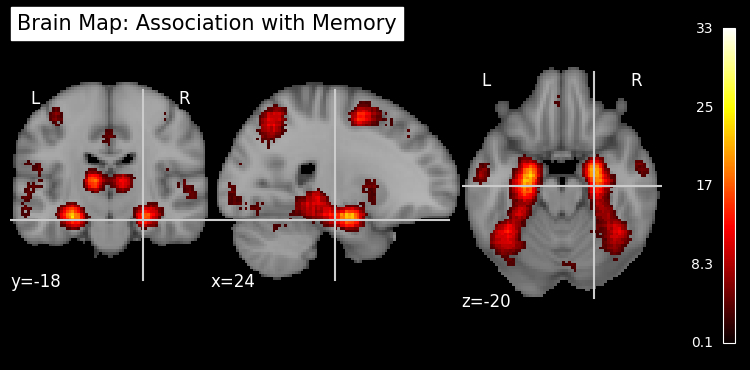

In [25]:
def load_preprocess(func_file):
    # Load the original image
    img_original = nib.load(func_file)
    data = img_original.get_fdata()

    # Remove negative values
    data[data < 0] = 0
    positives= data[data > 0]
    # Create a new nifti image with this filtered data
    positive_img = Nifti1Image(data, img_original.affine, img_original.header)
    return positive_img, positives

positive_img, pos_data = load_preprocess(func_file)

def visualize_data(positive_image):
    plotting.plot_stat_map(
        positive_image,
        bg_img=anat_file,
        threshold=threshold_val,
        cmap='hot',
        title=f"Brain Map: Association with {concept.title()}",
        cut_coords=coordinates,
        display_mode='ortho'
    )
    plt.show()


visualize_data(positive_img)

## 3. Distribution of voxel values

In this final step, we:

- Extract only the positive voxel values
- Create a histogram to observe the distribution of Z-values
- Add a title, axis labels and a grid for readability

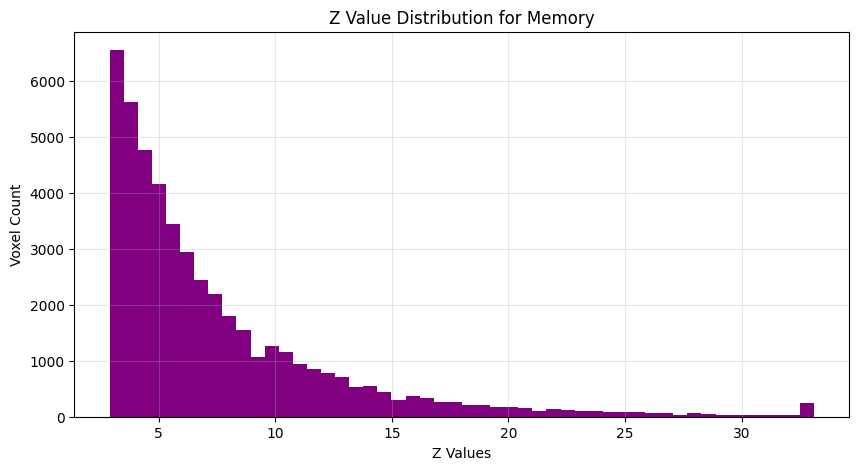

In [26]:
# Filter the postive values
def get_positives_dist(positives):


    # Let's plot
    plt.figure(figsize=(10, 5))
    plt.hist(
        positives, bins=50, color="purple"
    )  # the thick bars looked wierd so let's put the bins=50

    # And custumize
    plt.title(f"Z Value Distribution for {concept.title()}")
    plt.xlabel("Z Values")
    plt.ylabel("Voxel Count")
    plt.grid(True, alpha=0.3)

    plt.show()

get_positives_dist(pos_data)